In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.integrate import odeint
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

$\frac{F(t)}{F_0} = 1 - \frac{A_E(t)}{\pi R_*^2}$

$A_E \approx R_p^2 \arccos[\frac {x}{R_p}] - R_p x \sqrt{1-\frac{x^2}{R_p^2}}$

$x =d-R_*$

$A = A(R,d_1) + A(r,d_2)$

$A = r^2 \cos ^{-1} (\frac{d^2+r^2-R^2}{2dr}) + R^2 \cos ^{-1} (\frac{d^2+R^2-r^2}{2dR}) - \frac {1}{2}\sqrt{(-d+r+R)(d+r-R)(d-r+R)(d+r+R)}$

$d(t) = a \sqrt{\sin ^2 (\omega t) + \cos ^2 (i) \cos^2 (\omega t)}$

$P = 2 \pi \sqrt{\frac{a^3}{G(M+m)}}$

$T_{dur} = \frac{P}{\pi} \sin ^{-1} (\frac{\sqrt{(R_*+R_p)^2 - (b*R_*)^2}}{a})$

$b = \frac{a \cos (i)}{R_*}$

In [194]:
m_e = 5.9721986E24 # kilograms
m_j = 1.89813E27 # kilograms
AU= 1.496E11 # m
R_star = 695700E3 #m
r_earth = 6371.008E3 # m
r_jupiter = 69911E3 # m
A_star = np.pi*R_star**2

def period(m,a):
    M = 1.988435E30 # kg
    G = 6.674E-11 #N^2 m / kg^2
    return np.sqrt((4 * np.pi**2*a**3)/(G*(M+m)))

def omega(m,a):
    return 2*np.pi/period(m,a)

def incline_dist(i,r):
    return 2*R_star*np.sin(i*np.pi/180) - 2*r

def cross_time(D,m,a):
    return np.arcsin(D/a)/omega(m,a)

def b(a,i):
    return (a*np.cos(i*np.pi/180.))/R_star

def time(cross,inside):
    out  =80000 - (int(cross)/2 + int(inside))
    theta = np.linspace(0, 2*np.pi, int(cross))
    x1=np.zeros(out/2)
    x3=np.repeat(2*np.pi,int(inside))
    return np.append(np.append(np.append(np.append(x1,theta),x3),theta[::-1]),x1)

def area(t,r):
    AREA = np.pi*R_star**2
    return t * r**2 - r**2/2* np.sin(t/2) *np.cos(t/2)

def Relative_flux(area):
    return 1 - area / (A_star)

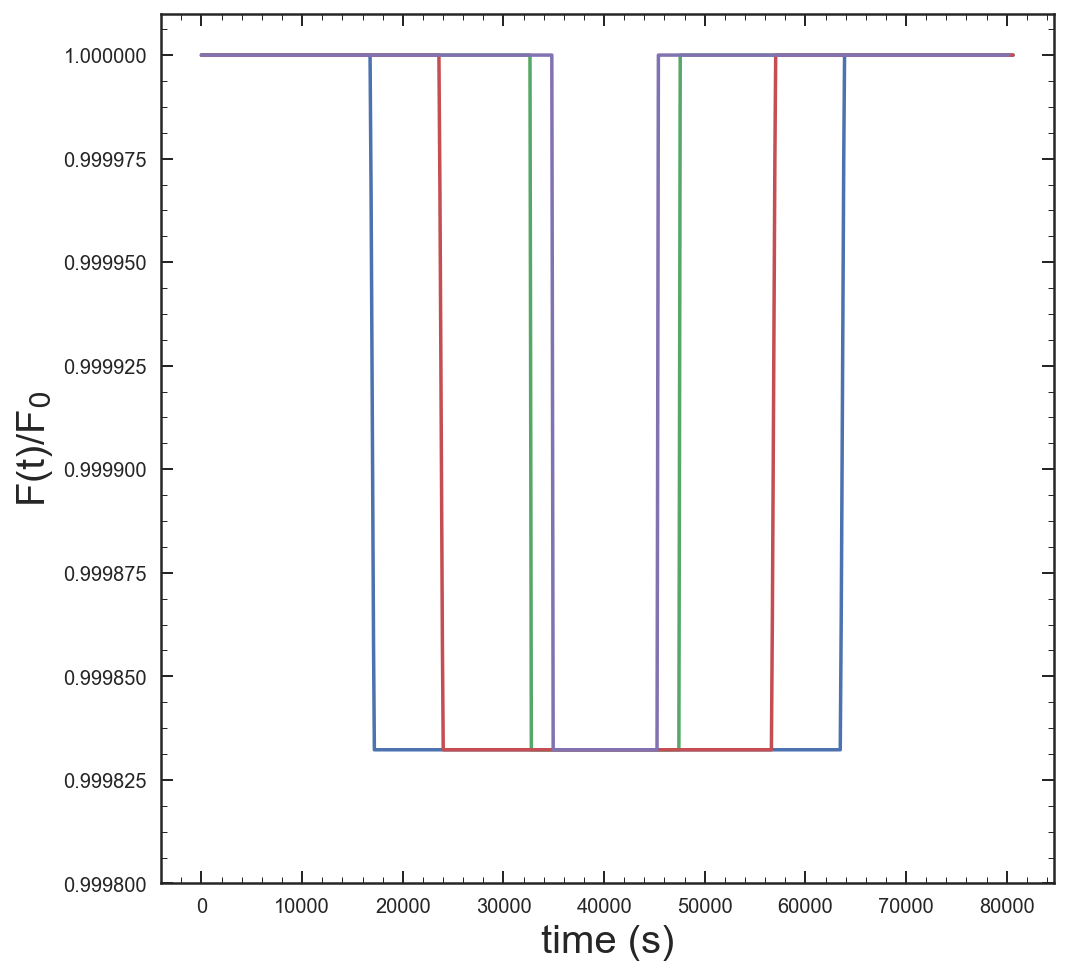

In [197]:
t1 = time(cross_time(2*r_earth,m_e,AU),cross_time(incline_dist(90,r_earth),m_e,AU))
t2 = time(cross_time(2*r_earth,m_e,AU*.1),cross_time(incline_dist(90,r_earth),m_e,AU*.1))
t3 = time(cross_time(2*r_earth,m_e,AU),cross_time(incline_dist(45,r_earth),m_e,AU))
t4 = time(cross_time(2*r_earth,m_e,AU*.1),cross_time(incline_dist(45,r_earth),m_e,AU*.1))
area1 = area(t1,r_earth)
area2 = area(t2,r_earth)
area3 = area(t3,r_earth)
area4 = area(t4,r_earth)

plt.figure(figsize=[8,8])
plt.plot(np.arange(t1.size),Relative_flux(area1))
plt.plot(np.arange(t2.size),Relative_flux(area2))
plt.plot(np.arange(t3.size),Relative_flux(area3))
plt.plot(np.arange(t4.size),Relative_flux(area4))
plt.ylim(0.9998,1.00001)
plt.xlabel('time (s)',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)

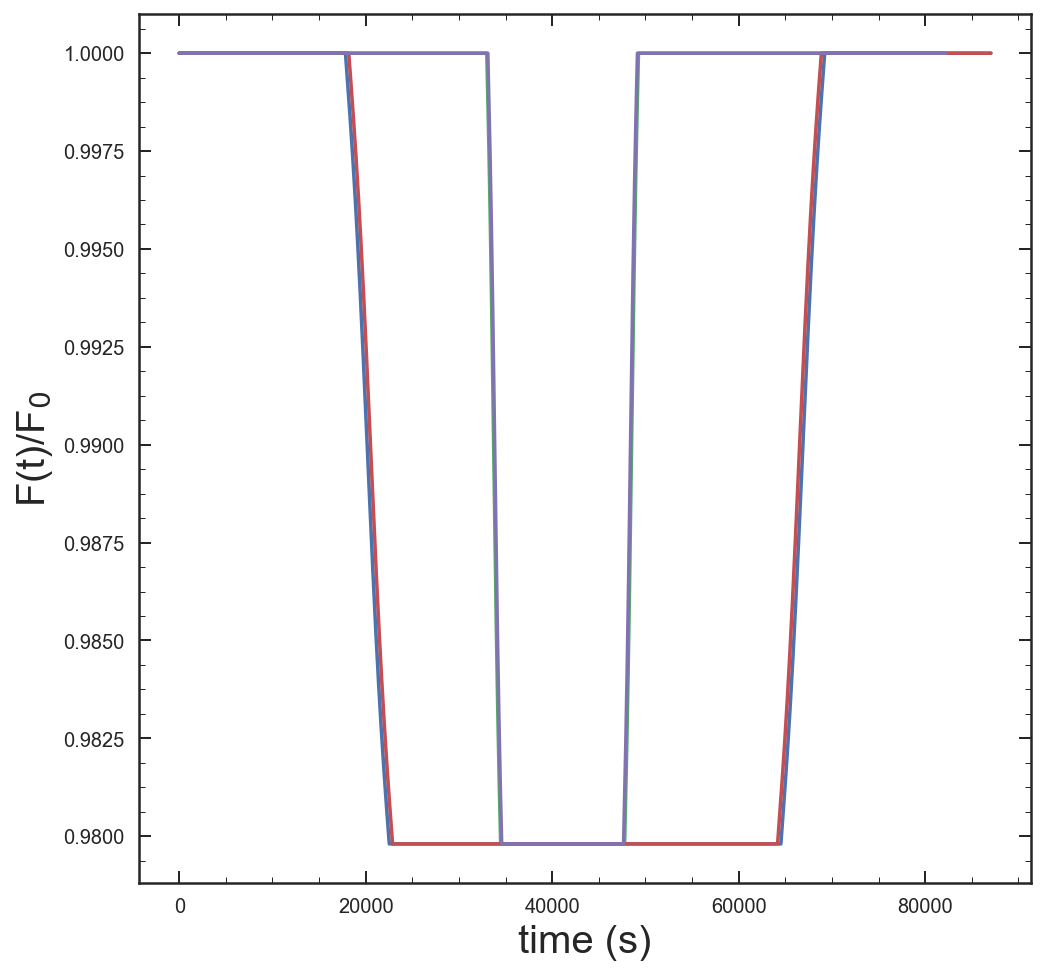

In [200]:
t1 = time(cross_time(2*r_jupiter,m_j,AU),cross_time(incline_dist(90,r_jupiter),m_j,AU))
t2 = time(cross_time(2*r_jupiter,m_j,AU*.1),cross_time(incline_dist(90,r_jupiter),m_j,AU*.1))
t3 = time(cross_time(2*r_jupiter,m_j,AU),cross_time(incline_dist(80,r_jupiter),m_j,AU))
t4 = time(cross_time(2*r_jupiter,m_j,AU*.1),cross_time(incline_dist(80,r_jupiter),m_j,AU*.1))
area1 = area(t1,r_jupiter)
area2 = area(t2,r_jupiter)
area3 = area(t3,r_jupiter)
area4 = area(t4,r_jupiter)

plt.figure(figsize=[8,8])
plt.plot(np.arange(t1.size),Relative_flux(area1))
plt.plot(np.arange(t2.size),Relative_flux(area2))
plt.plot(np.arange(t3.size),Relative_flux(area3))
plt.plot(np.arange(t4.size),Relative_flux(area4))
plt.xlabel('time (s)',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)